In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def generate_data(size, lb, ub):
    
    m = np.random.uniform(lb/2, ub/2)
    c = np.random.uniform(lb/2, ub/2)
    
    
    line = lambda x: m*x + c
    
    X = np.zeros((size, 3))
    Y = np.zeros((size, 1))
        
    for i in range(size):
        x1 = np.random.uniform(lb, ub)
        x2 = np.random.uniform(lb, ub)
            
        X[i] = np.array([1, x1, x2])
        
        if x2>=line(x1): #above the line 1, below the line -1
            Y[i] = 1
        else:
            Y[i] = -1
        
    return X, Y, line
    

In [79]:
def perceptron(X, Y, max_iter=100000):
    W = np.random.random((3,1))
    count = 0
    samples = len(Y)
    
    flag = True
    
    while flag:
        count+=1
        
        flag = False
        indecies = list(range(samples))
        indecies = np.random.choice(indecies, len(indecies), replace=False)
        for i in indecies:
            x = X[i]
            y = Y[i]
            y_hat = np.dot(W.T, x)
            
            if y*y_hat<=0:
                W = (W.T + y*x).T
                flag = True
                break
        if count==max_iter:
            print('Max Iterations reached')
            break
    
    hypothesis = lambda x: -(W[1]/W[2])*x - W[0]/W[2]
    
    return hypothesis, count, W

In [80]:
def plot(X, Y, line, hypothesis, lb=-5, ub=5):
    plt.ylim(lb, ub)
    plt.xlim(lb, ub)
    plt.xlabel('x1 feature')
    plt.ylabel('x2 feature')
    
    x1 = np.linspace(lb, ub, 100)
    true = line(x1)
    predicted = hypothesis(x1)
    
    plt.plot(x1, true, label='True separation line')
    plt.plot(x1, predicted, label='Perceptron prediction')
    plt.legend()
    
    for i in range(len(Y)):
        if Y[i]==1:
            marker = 'x'
            plt.scatter(X[i, 1], X[i, 2], color='red', marker='x')
        elif Y[i]==-1:
            plt.scatter(X[i, 1], X[i, 2], color='green', marker='o')
        

# N = 20

In [87]:
size = 20
lb = -100
ub = 100

The last iteration is 3


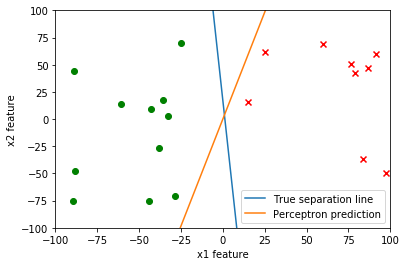

In [88]:
X, Y, line = generate_data(size, lb, ub)
hypothesis, count, W = perceptron(X, Y, max_iter=10000)
print("The last iteration is " + str(count))
plot(X, Y, line, hypothesis, lb, ub)

# N = 20, repeated

The last iteration is 6


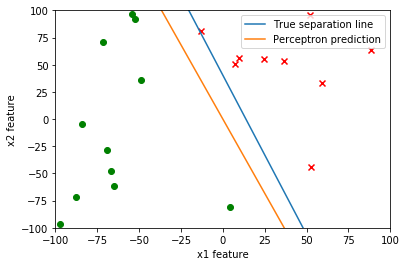

In [89]:
X, Y, line = generate_data(size, lb, ub)
hypothesis, count, W = perceptron(X, Y, max_iter=10000)
print("The last iteration is " + str(count))
plot(X, Y, line, hypothesis, lb, ub)

# N = 100

The last iteration is 19


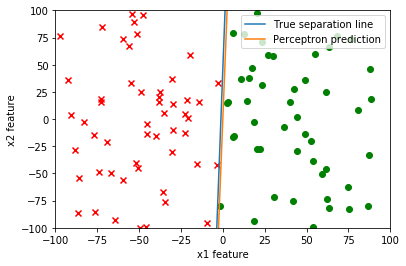

In [90]:
size = 100
X, Y, line = generate_data(size, lb, ub)
hypothesis, count, W = perceptron(X, Y, max_iter=10000)
print("The last iteration is " + str(count))
plot(X, Y, line, hypothesis, lb, ub)

# N = 1000

The last iteration is 5173


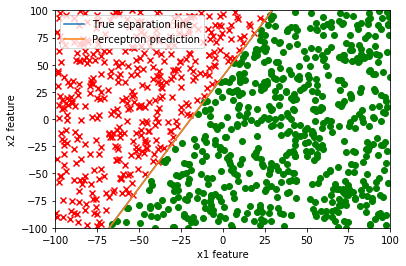

In [91]:
size = 1000
X, Y, line = generate_data(size, lb, ub)
hypothesis, count, W = perceptron(X, Y, max_iter=10000)
print("The last iteration is " + str(count))
plot(X, Y, line, hypothesis, lb, ub)

# Discussion

As we can see, for 20 samples, the decision boundary predicted by perceptron is not very close to the true target function. The reason is, that the perceptron finds a function that is "good enough" for separation, not necessarily the true function itself. For 20 samples, it quickly found a decision boundary that satisfies the separation criteria. 

For 100 and for 1000 samples, as we can see the predicted decision boundary is much closer to the target function. The reason is, that with that many samples, the set of possible solutions that satisfy separation criteria is much smaller, therefore perceptron's prediction must be closer to the target function, though not necessarily identical.